## THIS NOTEBOOK IS WRITTEN TO RUN ON GOOGLE COLAB

In [2]:
import sys
import sklearn
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from functools import partial

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


2024-11-23 01:49:21.438451: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-23 01:49:21.692771: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-23 01:49:21.761247: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-23 01:49:22.199272: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-23 01:49:24.296290: W tensorflow/compiler/tf2

In [3]:
!git clone https://github.com/JRAlbanese/DS4002-Project3

fatal: destination path 'DS4002-Project3' already exists and is not an empty directory.


In [4]:
%mv /content/DS4002-Project3/Resized_image_data/Valid/* /content/DS4002-Project3/Resized_image_data/
%mv /content/DS4002-Project3/Resized_image_data/Training/* /content/DS4002-Project3/Resized_image_data/

mv: cannot stat '/content/DS4002-Project3/Resized_image_data/Valid/*': No such file or directory
mv: cannot stat '/content/DS4002-Project3/Resized_image_data/Training/*': No such file or directory


In [8]:
import pandas as pd

#df = pd.read_csv('/content/combined_annotations.coco.csv')
df = pd.read_csv('/content/DS4002-Project3/Annotations/combined_annotations.coco.csv')
df = df.drop('info__year', axis = 1)
df = df.drop('info__version', axis = 1)
df = df.drop('info__url', axis = 1)#
df = df.drop('info__description', axis = 1)
df = df.drop('info__contributor', axis = 1)
df = df.drop('info__date_created', axis = 1)
df = df.drop('licenses__id', axis = 1)
df = df.drop('licenses__url', axis = 1)
df = df.drop('licenses__name', axis = 1)

In [22]:
print(df['annotations__category_id'].unique())

[4 2 3 1]


In [9]:
print(df.head(10))

   categories__id        categories__name categories__supercategory  \
0             0.0             pedestrians                      none   
1             1.0  children_wo_disability               pedestrians   
2             2.0   elderly_wo_disability               pedestrians   
3             3.0          non_vulnerable               pedestrians   
4             4.0         with_disability               pedestrians   
5             NaN                     NaN                       NaN   
6             NaN                     NaN                       NaN   
7             NaN                     NaN                       NaN   
8             NaN                     NaN                       NaN   
9             NaN                     NaN                       NaN   

   images__id  images__license  \
0         0.0              1.0   
1         1.0              1.0   
2         2.0              1.0   
3         3.0              1.0   
4         4.0              1.0   
5         5.0 

In [10]:
categories = df[['categories__id', 'categories__name']]
image_paths = df[['images__file_name']]
image_paths = '/content/DS4002-Project3/Resized_image_data/' + image_paths
image_paths = image_paths['images__file_name'].tolist()
classes_annotation = df['annotations__category_id'].tolist()

bounding_boxes = list(zip(df['annotations__bbox__001'], df['annotations__bbox__002'], df['annotations__bbox__003'], df['annotations__bbox__004']))
#print(df.head(10))

print(len(image_paths))
print(len(bounding_boxes))
print(len(classes_annotation))




4623
4623
4623


In [11]:
import cv2
import numpy as np
from tensorflow.keras.applications.mobilenet import preprocess_input

def load_image(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path)
    image = cv2.resize(image, target_size)
    image = preprocess_input(image)  # Normalize the image as required by MobileNet
    return image

def resize_bboxes(bboxes, original_size, target_size=(224, 224)):
    # Adjust bounding boxes to the new image size
    h, w = original_size
    new_h, new_w = target_size
    scale_x = new_w / w
    scale_y = new_h / h
    bboxes_resized = []
    for bbox in bboxes:
        xmin, ymin, xmax, ymax = bbox
        bboxes_resized.append([
            int(xmin * scale_x),
            int(ymin * scale_y),
            int(xmax * scale_x),
            int(ymax * scale_y),
        ])
    return bboxes_resized

In [12]:
images = []
bboxes = []
classes = []

for idx, img_path in enumerate(image_paths):
    try:
        print(img_path)
        img = load_image(img_path)
        images.append(img)
        bboxes.append(bounding_boxes[idx])
        classes.append(classes_annotation[idx])
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")

images = np.array(images)
bboxes = np.array(bboxes)
classes = np.array(classes)


Streaming output truncated to the last 5000 lines.
>  - Expected 'filename' to be a str or path-like object

nan
Error loading image nan: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'imread'
> Overload resolution failed:
>  - Expected 'filename' to be a str or path-like object
>  - Expected 'filename' to be a str or path-like object
>  - Expected 'filename' to be a str or path-like object

nan
Error loading image nan: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'imread'
> Overload resolution failed:
>  - Expected 'filename' to be a str or path-like object
>  - Expected 'filename' to be a str or path-like object
>  - Expected 'filename' to be a str or path-like object

nan
Error loading image nan: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'imread'
> Overload resolution failed:
>  - Expected 'filename' to be a str or path-like object
>  - Expected 'filename' to be a str or path-like object
>  - Expected 'filename' to be a str or path-like object



In [13]:
print(images.shape)
print(bboxes.shape)
print(classes.shape)

(1601, 224, 224, 3)
(1601, 4)
(1601,)


In [14]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_bboxes, test_bboxes, train_classes, test_classes = train_test_split(images, bboxes, classes, test_size=0.2)

In [15]:
from tensorflow.keras.utils import to_categorical
num_classes = 5

non1hot_test_classes = test_classes

train_classes = to_categorical(train_classes, num_classes=num_classes)
test_classes = to_categorical(test_classes, num_classes=num_classes)

In [20]:
print(test_classes)

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]]


In [16]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization


#Mobilenet shape
input_shape = (224, 224, 3)
num_classes = 5

# instantiating model base
RNbackbone = ResNet50(input_shape=input_shape, include_top=False)
RNbackbone.trainable = False

#
x = RNbackbone.output
x = layers.Conv2D(1024, (3, 3), activation='relu')(x)
x = layers.GlobalAveragePooling2D()(x)

# output layers bounding box regression and class prediction
#x = layers.GlobalAveragePooling2D()(MNbackbone.output)
x = layers.Dense(1024, activation='relu')(x)


bbox_output = layers.Dense(4, activation='sigmoid', name='bbox')(x)  # Using sigmoid to scale between 0 and 1
class_output = layers.Dense(num_classes, activation='softmax', name='class')(x)

# Combine the outputs into a single model
ResNetmodel = Model(inputs=RNbackbone.input, outputs=[bbox_output, class_output])


I0000 00:00:1732326595.450488   25684 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1732326596.559419   25684 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1732326596.559846   25684 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1732326596.568966   25684 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [17]:
ResNetmodel.compile(optimizer='adam',
              loss={'bbox': 'mse', 'class': 'categorical_crossentropy'},  # Loss for bbox and classification
              metrics={'bbox': 'accuracy', 'class': 'accuracy'})

ResNetmodel.fit(train_images, [train_bboxes, train_classes], epochs=10, batch_size=32)

2024-11-23 01:50:01.677728: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 770703360 exceeds 10% of free system memory.
2024-11-23 01:50:02.459444: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 770703360 exceeds 10% of free system memory.


Epoch 1/10


I0000 00:00:1732326610.168083   26042 service.cc:146] XLA service 0x7b42bc004100 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732326610.168111   26042 service.cc:154]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-11-23 01:50:10.558578: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-23 01:50:11.811588: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8906


 1/40 ━━━━━━━━━━━━━━━━━━━━ 14:18 22s/step - bbox_accuracy: 0.1250 - bbox_loss: 64373.8711 - class_accuracy: 0.2500 - class_loss: 1.5918 - loss: 64375.4609

I0000 00:00:1732326624.872378   26042 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 106ms/step - bbox_accuracy: 0.4258 - bbox_loss: 69119.6328 - class_accuracy: 0.2762 - class_loss: 15.7237 - loss: 69135.3594
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - bbox_accuracy: 0.4521 - bbox_loss: 69103.9688 - class_accuracy: 0.3462 - class_loss: 7.4693 - loss: 69111.4375
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - bbox_accuracy: 0.4521 - bbox_loss: 69103.9688 - class_accuracy: 0.2942 - class_loss: 5.0760 - loss: 69109.0469
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - bbox_accuracy: 0.4521 - bbox_loss: 69103.9688 - class_accuracy: 0.3541 - class_loss: 2.4780 - loss: 69106.4531
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - bbox_accuracy: 0.4521 - bbox_loss: 69103.9688 - class_accuracy: 0.3565 - class_loss: 1.9643 - loss: 69105.9297
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - bbox_accuracy: 0.4521 - bbox_loss: 69103.9688 - class_accuracy: 0.3390 - class_loss: 3.8033 - loss: 69107.7734
Epoch 7/10
40/40 ━━

In [24]:
#Now training without the pretrained model frozen
for layer in RNbackbone.layers:
  layer.trainable = True

ResNetmodel.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.0005), #half of default
              loss={'bbox': 'mse', 'class': 'categorical_crossentropy'},  # Loss for bbox and classification
              metrics={'bbox': 'accuracy', 'class': 'accuracy'})

training_history = ResNetmodel.fit(train_images, [train_bboxes, train_classes], epochs=20, batch_size=32)

2024-11-23 01:54:10.293519: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 770703360 exceeds 10% of free system memory.
2024-11-23 01:54:11.117095: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 770703360 exceeds 10% of free system memory.


Epoch 1/20


2024-11-23 01:54:53.252281: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 18.25GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-11-23 01:54:53.252366: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 18.25GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-11-23 01:55:18.803883: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_26', 72 bytes spill stores, 72 bytes spill loads



40/40 ━━━━━━━━━━━━━━━━━━━━ 80s 315ms/step - bbox_accuracy: 0.4521 - bbox_loss: 69104.0547 - class_accuracy: 0.3081 - class_loss: 5.6160 - loss: 69109.6641
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 324ms/step - bbox_accuracy: 0.4521 - bbox_loss: 69103.9688 - class_accuracy: 0.4416 - class_loss: 1.2702 - loss: 69105.2422
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 317ms/step - bbox_accuracy: 0.4522 - bbox_loss: 69103.9688 - class_accuracy: 0.5303 - class_loss: 1.0537 - loss: 69105.0156
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 309ms/step - bbox_accuracy: 0.4544 - bbox_loss: 69103.9766 - class_accuracy: 0.7252 - class_loss: 0.7356 - loss: 69104.7109
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 311ms/step - bbox_accuracy: 0.4521 - bbox_loss: 69103.9688 - class_accuracy: 0.7989 - class_loss: 0.5661 - loss: 69104.5391
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 317ms/step - bbox_accuracy: 0.4501 - bbox_loss: 69103.9688 - class_accuracy: 0.8980 - class_loss: 0.2840 - loss: 69104.2578
Epoch 7/20
40/4

In [25]:
test_loss, bbox_loss, class_loss, bbox_accuracy, class_accuracy = ResNetmodel.evaluate(test_images, [test_bboxes, test_classes])

print(f"Test loss: {test_loss}")
print(f"Bounding Box Loss: {bbox_loss}")
print(f"Classification Loss: {class_loss}")
print(f"Bounding Box Accuracy: {bbox_accuracy}")
print(f"Classification Accuracy: {class_accuracy}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 235ms/step - bbox_accuracy: 0.5000 - bbox_loss: 73996.9531 - class_accuracy: 0.2974 - class_loss: 2.7335 - loss: 74597.3906
Test loss: 70069.3046875
Bounding Box Loss: 66480.4453125
Classification Loss: 2.651510000228882
Bounding Box Accuracy: 0.4735202491283417
Classification Accuracy: 0.3208722770214081


11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 417ms/step


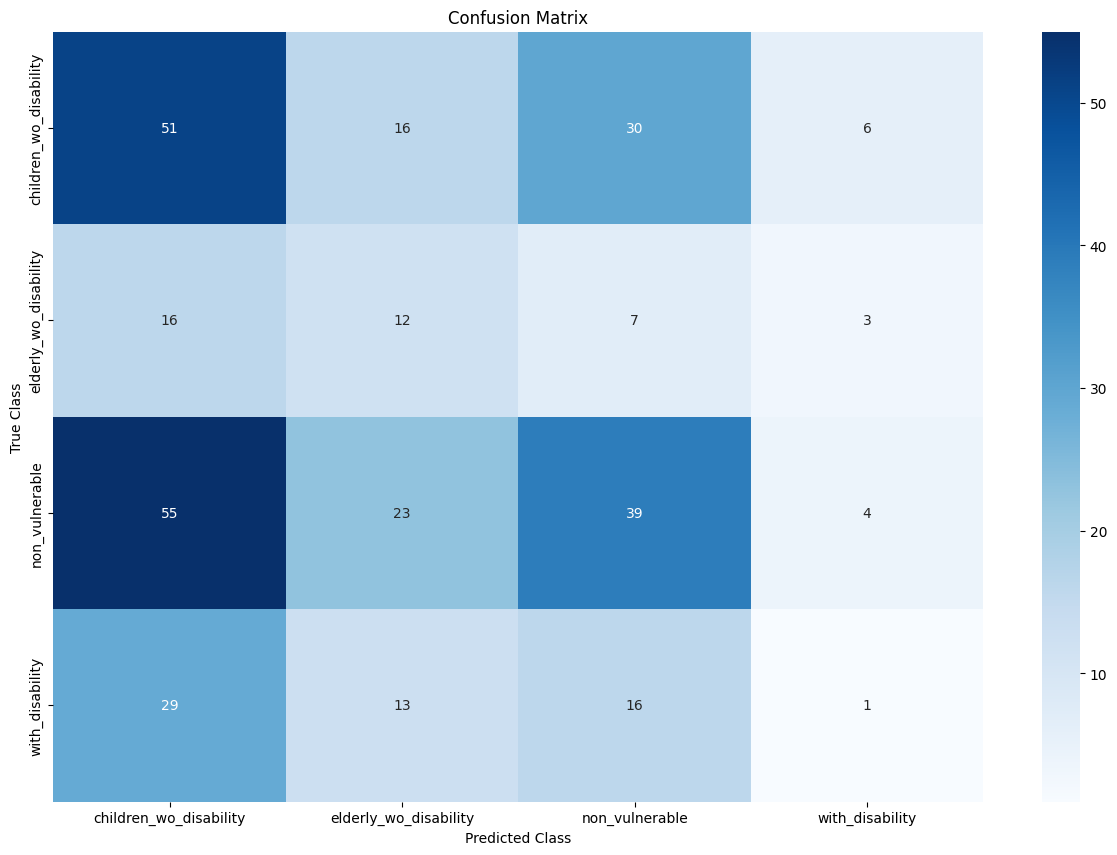

In [26]:
from sklearn.metrics import confusion_matrix

predictions = ResNetmodel.predict(test_images)
predicted_class_probabilities = predictions[1]
predicted_classes = np.argmax(predicted_class_probabilities, axis=-1)

cm = confusion_matrix(non1hot_test_classes, predicted_classes)
#print(cm)

import seaborn as sns
import matplotlib.pyplot as plt

class_names = categories['categories__name'].head(5).drop(0)

plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print("hi")

In [ ]:
import matplotlib.patches as patches

test_idx = 0

image = test_images[test_idx]
true_bbox = test_bboxes[test_idx]
xmin_true, ymin_true, xmax_true, ymax_true = true_bbox

result = ResNetmodel.predict(np.expand_dims(image, axis=0))
predicted_bbox = result[0][0]
xmin_pred, ymin_pred, xmax_pred, ymax_pred = predicted_bbox
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(image)  # Display the image
# Create a rectangle patch for the true bounding box (in blue)
rect_true = patches.Rectangle((xmin_true, ymin_true), xmax_true - xmin_true, ymax_true - ymin_true,
                              linewidth=2, edgecolor='blue', facecolor='none', label='True bbox')
ax.add_patch(rect_true)  # Add the true bounding box to the image

# Create a rectangle patch for the predicted bounding box (in red)
rect_pred = patches.Rectangle((xmin_pred, ymin_pred), xmax_pred - xmin_pred, ymax_pred - ymin_pred,
                               linewidth=2, edgecolor='red', facecolor='none', label='Predicted bbox')
ax.add_patch(rect_pred)  # Add the predicted bounding box to the image

# Optionally, add text with predicted class label
predicted_class = test_classes[test_idx]  # Predicted class for the image
ax.text(xmin_pred, ymin_pred - 10, f"Predicted Class: {predicted_class}", color='red', fontsize=12)

ax.legend()
plt.show()